# What is the Problem?

<font color='blue' size='3'><strong> Buy Me That Look: An Approach for Recommending Similar Fashion Products  </strong></font>

<font color='blue' size='3'><strong> https://arxiv.org/pdf/2008.11638.pdf  </strong></font>

## Problem Statement

## Recommending Similar Fashion Products

Recommending Similar Fashion Products means focus on the problem of similar fashion item recommendation for multiple fashion items.

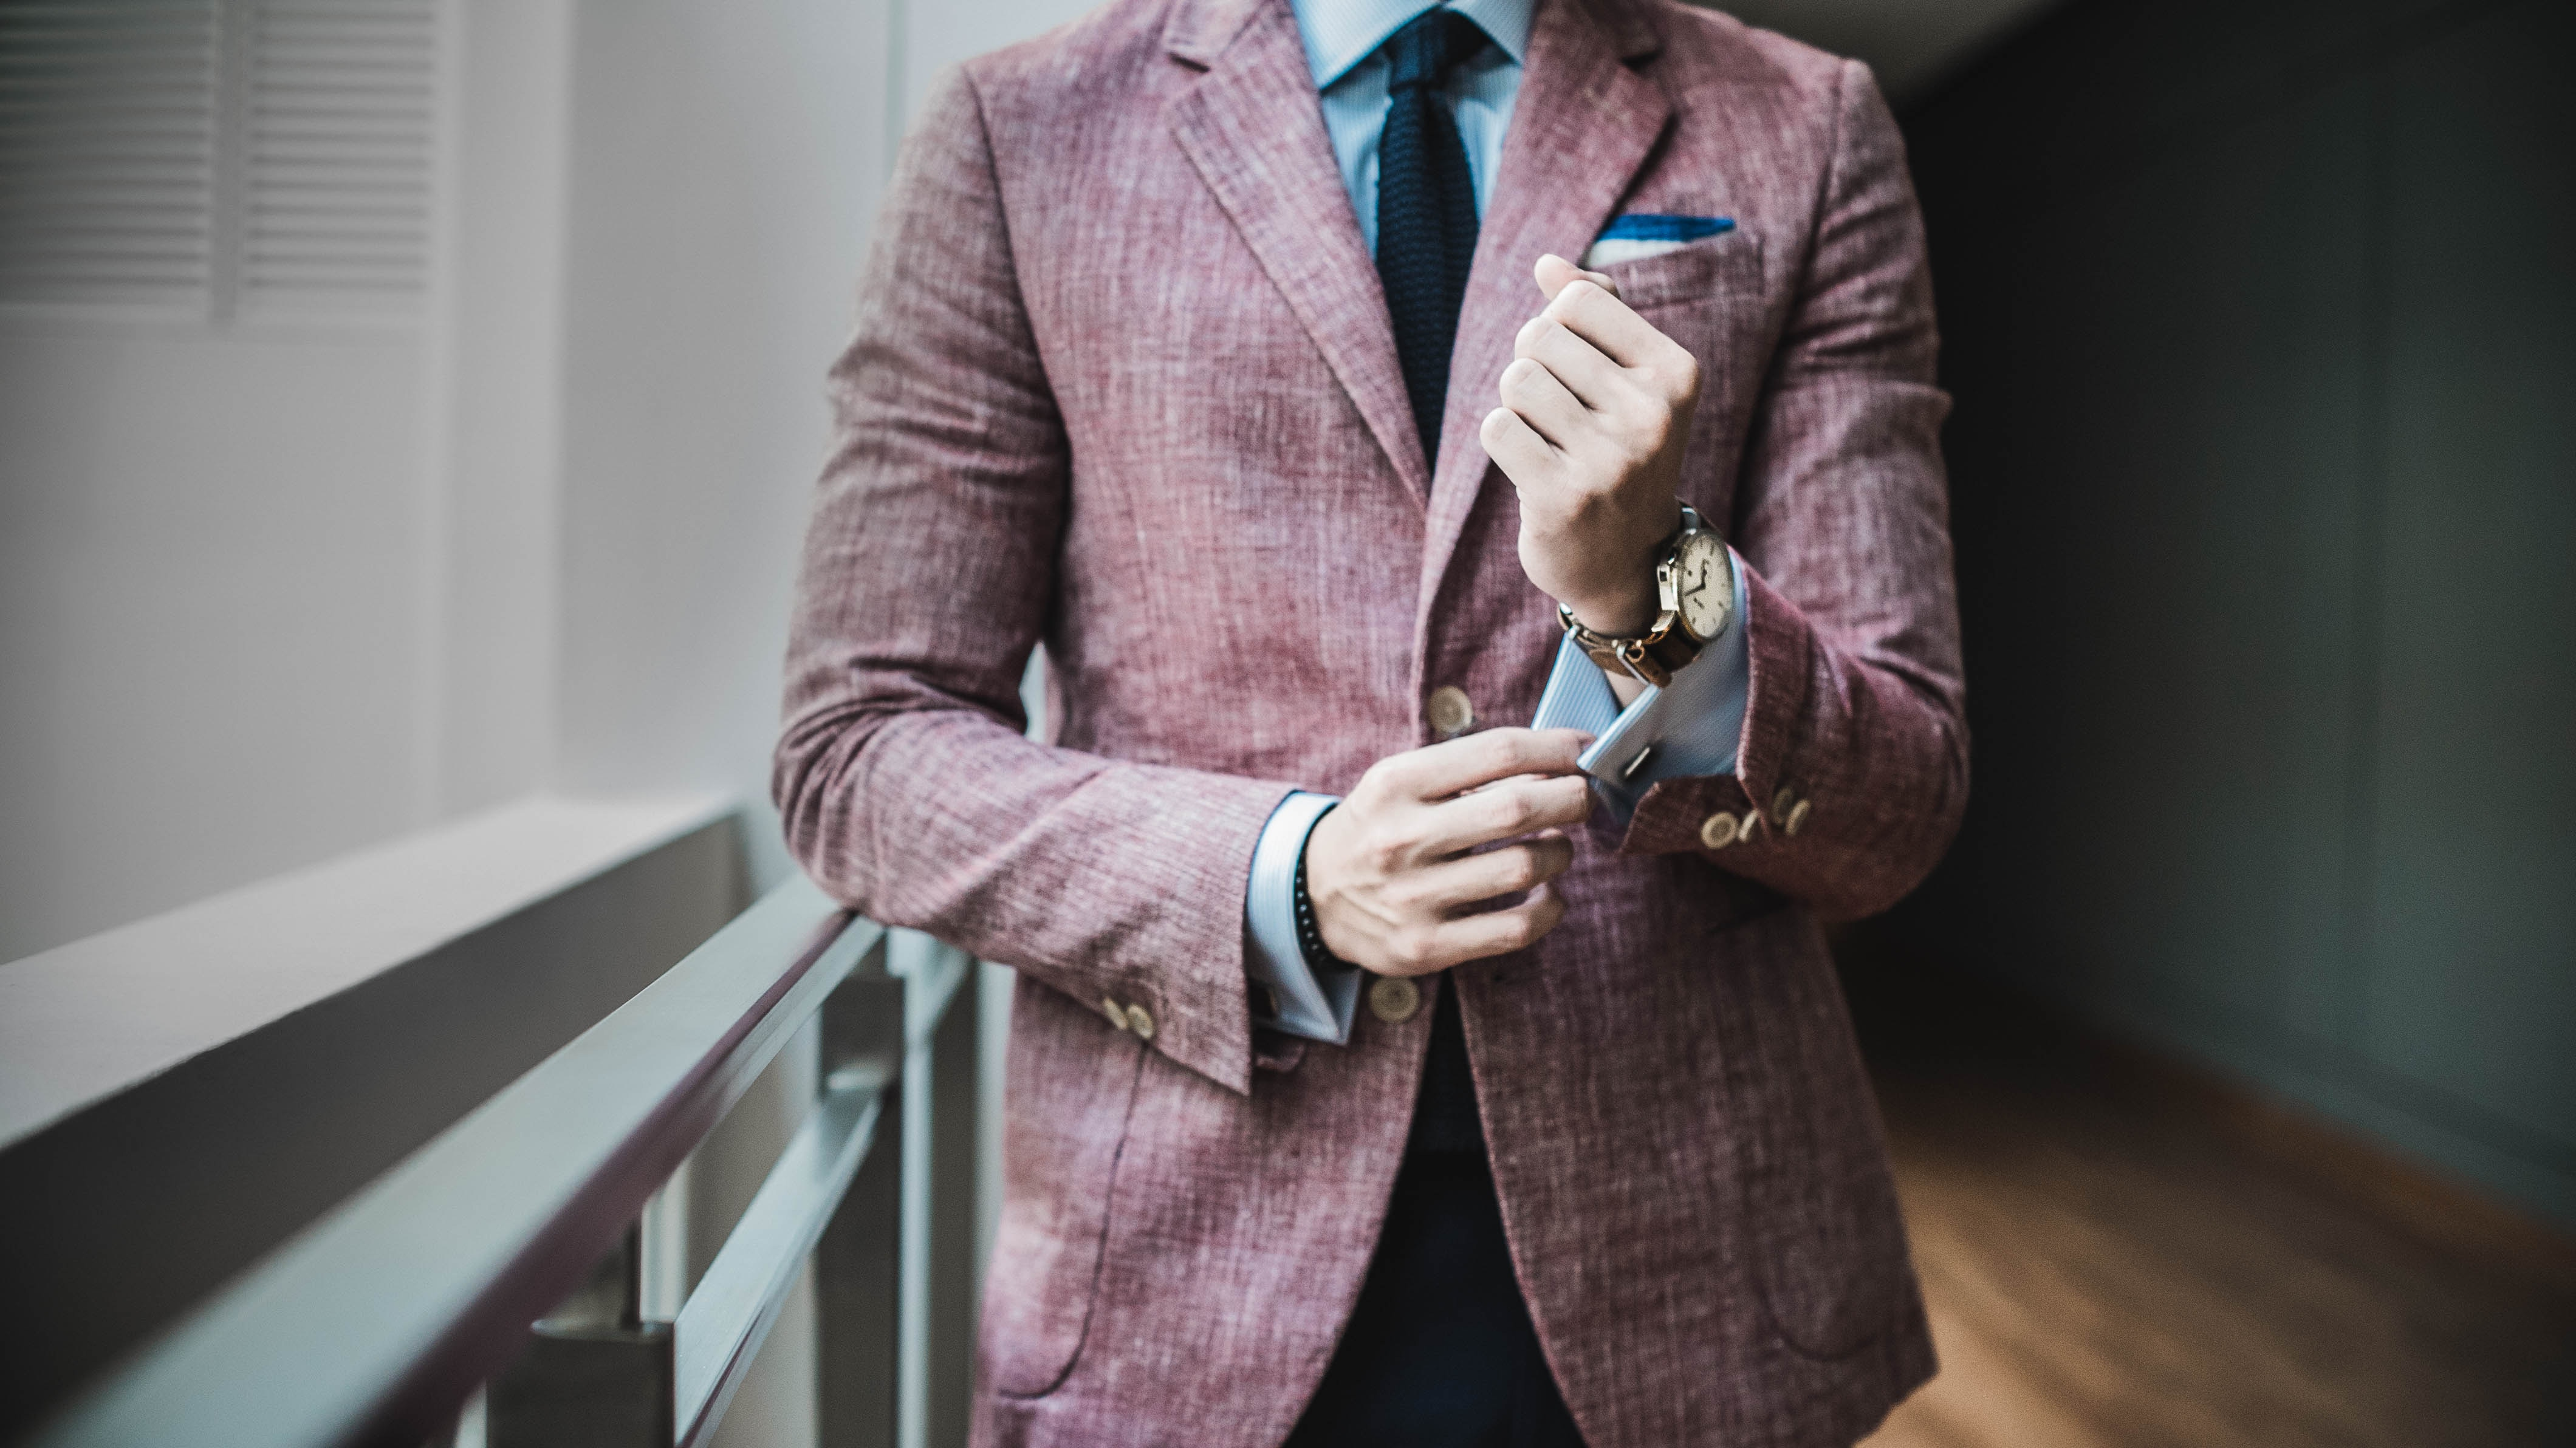

<font color='blue' size='3'><strong> Abstract of Research paper  </strong></font>

Given a
Product Display Page for a fashion item in an online e-commerce
platform, we identify the images with a full-shot look, i.e., the one
with a full human model wearing the fashion item. we
focus on the retrieval of multiple fashion items at once. This is an
important problem because while a user might have searched for
a particular primary article type (e.g., men’s shorts), the human
model in the full-shot look image would usually be wearing secondary fashion items as well (e.g., t-shirts, shoes etc). Upon looking
at the full-shot look image in the PDP, the user might also be interested in viewing similar items for the secondary article types. 

## Business Impact

The recent proliferation of numerous fashion e-commerce platforms has led to a surge in online shopping of fashion products. Fashion being the dominant aspect in online retail sales, efficient and effective fashion products recommendation systems could boost revenue, improve customer experience and engagement.

## Client

The model can be used by any online fashion company<br>
Most of the big Online fashion company uses some form of recommender system to increase the customer experience and engagement 

## USeful Links
<ul>
<li>https://arxiv.org/pdf/2008.11638.pdf
<li>https://google.github.io/mediapipe/solutions/pose.html
<li>https://arxiv.org/pdf/2004.10934.pdf
<li>https://towardsdatascience.com/yolov4-in-google-colab-train-your-custom-dataset-traffic-signs-with-ease-3243ca91c81d
</ul>

## Business objective and constraints

<ul>
<li>scalable
<li>Low Latency
<li>Minimum Error
</ul>

## Data

### DeepFashion2 Dataset
### https://github.com/switchablenorms/DeepFashion2

DeepFashion2 is a comprehensive fashion dataset. It contains 491K diverse images of 13 popular clothing categories from both commercial shopping stores and consumers. It totally has 801K clothing clothing items, where each item in an image is labeled with scale, occlusion, zoom-in, viewpoint, category, style, bounding box, dense landmarks and per-pixel mask.There are also 873K Commercial-Consumer clothes pairs.
The dataset is split into a training set (391K images), a validation set (34k images), and a test set (67k images).

 Each image in seperate image set has a unique six-digit number such as 000001.jpg. A corresponding annotation file in json format is provided in annotation set such as 000001.json.

Each annotation file is organized as below:
<ul>

<li><b>source</b>: a string, where 'shop' indicates that the image is from commercial store while 'user' indicates that the image is taken by users.</n>


<li><b>pair_id</b>: a number. Images from the same shop and their corresponding consumer-taken images have the same pair id.


<li> <ul><li>item 1
<ul><li><b>category_name</b>: a string which indicates the category of the item.
<li><b>category_id</b>: a number which corresponds to the category name. <li><b>category_id</b>:

 1 represents short sleeve top, 

2 represents long sleeve top,

 3 represents short sleeve outwear,
 
  4 represents long sleeve outwear,
  
   5 represents vest,
   
  6 represents sling, 
    
  7 represents shorts,
  
  8 represents trousers,
  
  9 represents skirt, 
  
  10 represents short sleeve dress, 
  
  11 represents long sleeve dress, 
  
  12 represents vest dress 
  
  13 represents sling dress.

<li><b>style:</b> a number to distinguish between clothing items from images with the same pair id

<li><b>bounding_box:</b> [x1,y1,x2,y2]，where x1 and y_1 represent the upper left point coordinate of bounding box, x_2 and y_2 represent the lower right point coordinate of bounding box. (width=x2-x1;height=y2-y1)


<li><b>landmarks:</b> [x1,y1,v1,...,xn,yn,vn], where v represents the visibility: v=2 visible; v=1 occlusion; v=0 not labeled.


<li><b>segmentation:</b> [[x1,y1,...xn,yn],[ ]], where [x1,y1,xn,yn] represents a polygon and a single clothing item may contain more than one polygon.


<li><b>scale:</b> a number, where 1 represents small scale, 2 represents modest scale and 3 represents large scale.

<li><b>occlusion:</b> a number, where 1 represents slight occlusion(including no occlusion), 2 represents medium occlusion and 3 represents heavy occlusion.


<li><b>zoom_in:</b> a number, where 1 represents no zoom-in, 2 represents medium zoom-in and 3 represents lagre zoom-in.


<li><b>viewpoint:</b> a number, where 1 represents no wear, 2 represents frontal viewpoint and 3 represents side or back viewpoint.
</ul>

<li>item 2

...
<li> item n

</ul>

## Evaluration Metrics
<br>
Stage 1: F1 score<br>
Stage 2: IOU<br>
Stage 3: Precision and Recall<br>



### Approach to solve problem

### Stage 1 Front-facing Full-shot Image Detection

A Product Display Page (PDP) contains
the shots (or views) of the queried primary fashion article (men’s
shorts in this case) from different angles and poses. The PDP also
contains a full-shot look image where a full human model can be
seen wearing the searched primary fashion product. However, in
addition to the primary product, the model may also wear other
secondary fashion items as well (e.g., t-shirts, shoes etc, in this case).
This full-shot look image is the one that is of interest to us. To
identify such a full-shot image among all the PDP images, we make
use of a heuristic criterion along with estimation of human keypoints with a computer vision based human pose detection method


### Stage 2 Fashion article Detection and Localisation

The output of the previous component of our pipeline is a front
posing, full-shot look image, which is further passed to the fashion
article detection module, as described next. Since a full-shot look
image contains multiple articles and accessories as worn, or held
by the human model, we need to identify each fashion article for
which we want to recommend similar fashion products from the
catalog database.
For this subtask of identifying different article types, we must
crop or segment out the individual Regions Of Interests (ROIs) from
the full-shot look image. However, mere segmentation of the fashion
article might render out incomplete articles due to occlusion from
other peripheral objects. Hence, we train the article type detection
and localisation module using the bounding box tags for the fashion
articles present in these images.

### Stage 3 Similar Article prediction 

The output of Fashion Article Detection and Localization will be cropped based on the output of the bounding box. Prediction of the articles can be done using similarity score or embedding



### Models used in different Stages
Stage 1. MediaPipe Pose (https://google.github.io/mediapipe/solutions/pose.html)



Stage 2. YOLOV4 (https://github.com/AlexeyAB) Custom training

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import os
import json
import cv2
from google.colab.patches import cv2_imshow
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from matplotlib.pyplot import figure
import warnings
sns.set()
warnings.filterwarnings("ignore")

#### we have two folders 

In [6]:
path='/content/dataset'
for folder in os.listdir(path):
    print(folder)

annos
image


### Sample file of annos

In [7]:
file=os.listdir(path+'/annos')[0]
with open(os.path.join('/content/dataset/annos',file)) as f:
    data = json.load(f)
data

{'item1': {'bounding_box': [163, 287, 234, 406],
  'category_id': 10,
  'category_name': 'short sleeve dress',
  'landmarks': [192,
   289,
   1,
   182,
   288,
   1,
   190,
   294,
   1,
   198,
   300,
   1,
   198,
   294,
   1,
   199,
   290,
   1,
   176,
   290,
   2,
   168,
   309,
   2,
   168,
   333,
   2,
   177,
   335,
   2,
   180,
   321,
   1,
   177,
   308,
   1,
   177,
   312,
   1,
   178,
   326,
   1,
   178,
   341,
   2,
   172,
   369,
   2,
   167,
   402,
   2,
   204,
   402,
   2,
   233,
   395,
   2,
   221,
   366,
   2,
   212,
   338,
   2,
   214,
   321,
   2,
   208,
   307,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   204,
   296,
   1],
  'occlusion': 2,
  'scale': 1,
  'segmentation': [[183.65666037153918,
    285.667820914187,
    181.04228128657184,
    287.66705197916207,
    177.81275418161215,
    287.82083898416016,
    175.04458809164672,
    290.4352180691275,
    172.891570021673

#### Showing one random Image with and without bounding box

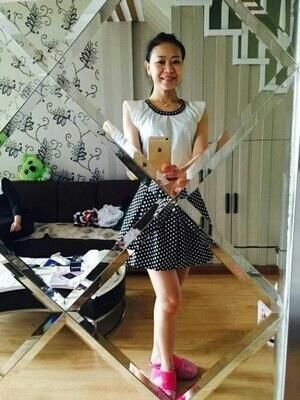

In [206]:
image = cv2.imread(path+'/image/001107.jpg')
cv2_imshow(image)

user


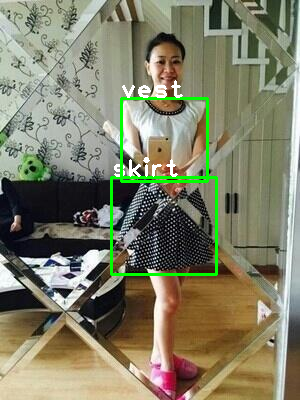

In [207]:
with open(path+'/annos/001107.json') as f:
    data = json.load(f)
image = cv2.imread(path+'/image/001107.jpg')
for key in data.keys():
    if 'source' in key:  ### json is nested, only using source information
        print(data[key])
    if 'item' in key:
        x1,y1=data[key]['bounding_box'][0],data[key]['bounding_box'][1]
        x2,y2=data[key]['bounding_box'][2],data[key]['bounding_box'][3]
        image=cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2) 
        image=cv2.putText(image,data[key]['category_name'],org=(x1, y1), fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=1.75,color=(255, 255, 255),thickness=2)
cv2_imshow(image)

### Shop image

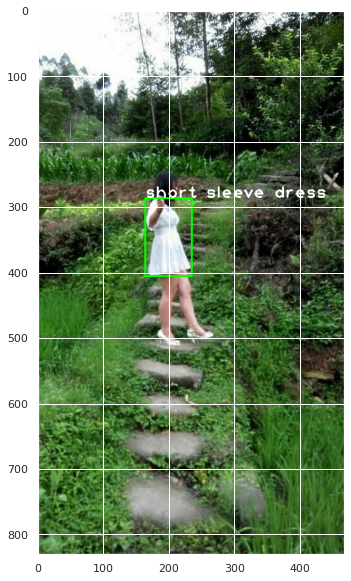

In [8]:
for file in os.listdir('/content/dataset/annos'):
    with open(path+'/annos/'+file) as f:
        data = json.load(f)
    image = cv2.imread(path+'/image/'+file.split('.')[0]+'.jpg')
    for key in data.keys():
        if 'source' in key: # if source is user we leave that image 
            data[key]=='user'
            continue
        if 'item' in key:
            x1,y1=data[key]['bounding_box'][0],data[key]['bounding_box'][1]
            x2,y2=data[key]['bounding_box'][2],data[key]['bounding_box'][3]
            image=cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2) 
            image=cv2.putText(image,data[key]['category_name'],org=(x1, y1), fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=1.75,color=(255, 255, 255),thickness=2)
    plt.figure(figsize=(10,10))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    break

In [9]:
def information(json_load,file):
  """
  Function to get relevent information from json
  input json , file name 
  output Relevent Dataframe
  
  """
  dictionary=dict()
    for key in json_load.keys():  
        if 'item' in key:
            dictionary[key]={'category_id':json_load[key]['category_id'],
                       'scale':json_load[key]['scale'],
                       'viewpoint':json_load[key]['viewpoint'],
                       'zoom_in':json_load[key]['zoom_in'],
                       'occlusion': json_load[key]['occlusion'],
                       'category_name':json_load[key]['category_name']}
    frame=pd.DataFrame(dictionary).T.reset_index(drop=True)
    frame['id']=file
    return frame

In [72]:
json_files=os.listdir(path+'/annos')
dataframe_source=pd.DataFrame()
dataframe_items=pd.DataFrame()
for file in json_files:  ### creating complete dataframe of relevent information of json
    with open(path+'/annos/'+file) as f:
        file=file.split('.')[0]
        data=json.load(f)
        dataframe_source=dataframe_source.append([[file,data['source']]])
        dataframe_items=dataframe_items.append(information(data,file))

In [193]:
# mapping number to there meaning
view_dict={1:'no wear',2:'frontal',3:'side or back'}
zoom_dict={1:'no zoom-in', 2: 'medium zoom-in',3:'lagre zoom-in'}
occlusion_dict={1:'slight occlusion', 2: 'medium occlusion',3: 'heavy occlusion'}
scale_dict={1:'small scale', 2: 'modest scale' ,3:'large scale'}

In [195]:
dataframe_items['viewpoint']=dataframe_items['viewpoint'].map(lambda x:view_dict[x])
dataframe_items['zoom_in']=dataframe_items['zoom_in'].map(lambda x:zoom_dict[x])
dataframe_items['occlusion']=dataframe_items['occlusion'].map(lambda x:occlusion_dict[x])
dataframe_items['scale']=dataframe_items['scale'].map(lambda x:scale_dict[x])

In [196]:
dataframe_items.head()

,category_id,category_name,occlusion,scale,viewpoint,zoom_in,id
0,10,short sleeve dress,slight occlusion,modest scale,side or back,no zoom-in,018650
0,7,shorts,heavy occlusion,modest scale,frontal,lagre zoom-in,030478
1,1,short sleeve top,slight occlusion,large scale,frontal,medium zoom-in,030478
0,8,trousers,heavy occlusion,small scale,side or back,no zoom-in,015510
1,5,vest,slight occlusion,small scale,frontal,no zoom-in,015510


In [197]:
dataframe_source.head()

,0,1
0,018650,shop
0,030478,shop
0,015510,shop
0,006955,user
0,015114,shop


In [198]:
dataframe_items.describe()

,category_id,category_name,occlusion,scale,viewpoint,zoom_in,id
count,52490,52490,52490,52490,52490,52490,52490
unique,13,13,3,3,3,3,32153
top,1,short sleeve top,slight occlusion,modest scale,frontal,no zoom-in,009750
freq,12556,12556,24793,26429,40711,33755,5


In [199]:
dataframe_source.describe()

,0,1
count,32153,32153
unique,32153,2
top,022386,shop
freq,1,21309


In [10]:
def plot_count_pie(column_name):

  """
  Function to plot count plot and pie chart of the given column

  """
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(121)
    sns.countplot(dataframe_items[column_name],color='blue')
    plt.xticks(rotation=90)
    plt.subplot(122)
    plt.pie(dataframe_items[column_name].value_counts().values,labels=dataframe_items[column_name].value_counts().index,autopct='%1.2f%%')
    plt.legend(bbox_to_anchor=(1,0))
    plt.show()
  

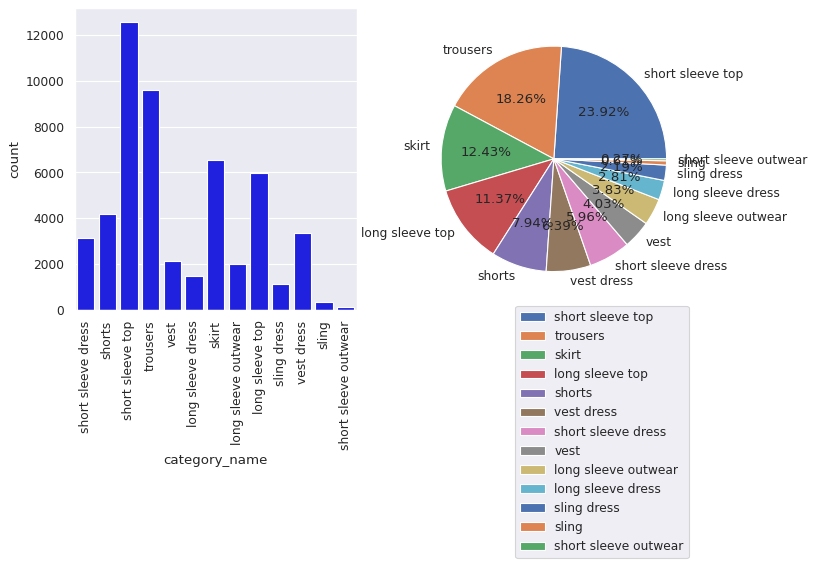

In [201]:
plot_count_pie('category_name')

#### Most common clothes present in the dataset is short sleeves and trousers

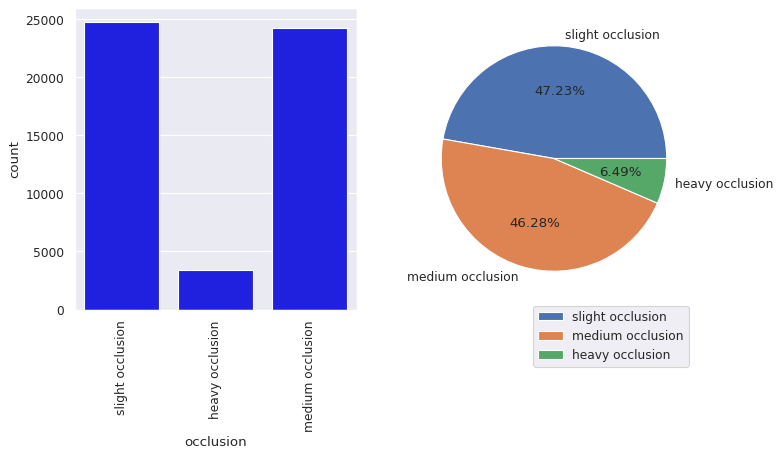

In [202]:
plot_count_pie('occlusion')

### Either there is very less occlusion or medium occlusion. Heavy occlusion is very less in the dataset

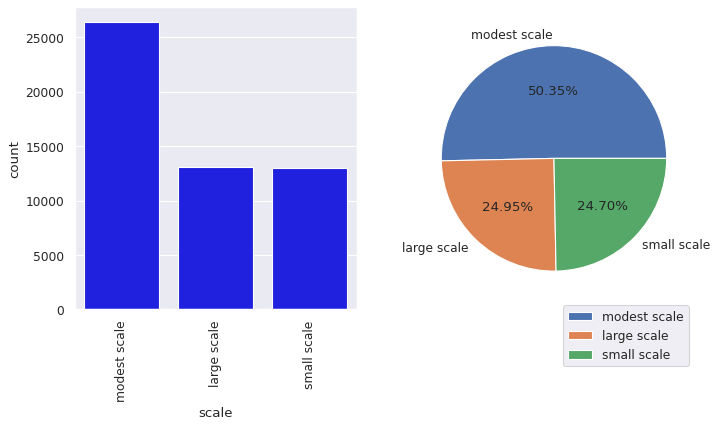

In [203]:
plot_count_pie('scale')

#### Most of the images are modest scale and large and small scale images are equally present

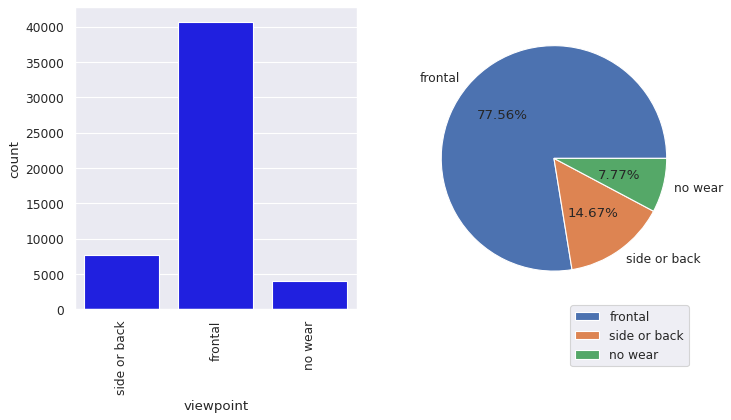

In [204]:
plot_count_pie('viewpoint')

### Most of the images are frontal which is very good since it is useful for our task 

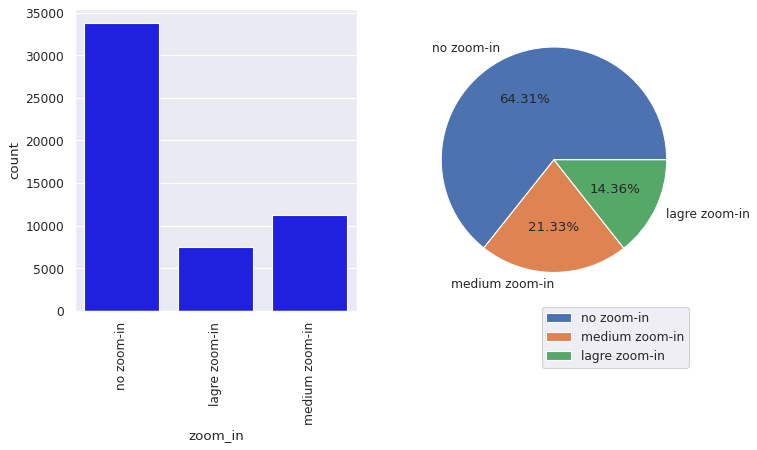

In [205]:
plot_count_pie('zoom_in')

Most of the images are NO zoom images which is also good for our task in hand

### We can perform more indepth Exploratory Data Analysis on this dataset but keeping our objective in mind it will not be useful since We will run a pose detection on this dataset and then train a yolov4 model on top of it so all we need is bounding box and Categories of images which we have already seen


### Final dataset used for showing similar images
## DeepFashion Dataset
### http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html

### Dataset Directory
<pre>
DeepFashion_inshop
├── MEN
│   ├── Denim
│   ├── Jackets_vests
│   │   └── id_00000084
|   |       ├──04_1_front.jpg
|   |       ├──04_2_side.jpg
|   |       ├──04_3_back.jpg
|   |       └──04_07_additional.jpg
│   ├── ......
│   └──Tees_Tanks
└── WOMEN
    ├── Denim
    |   └── id_00000085
    |       ├──04_1_front.jpg
    |       ├──04_2_side.jpg
    |       ├──04_3_back.jpg
    |       └──04_07_additional.jpg
    └── skirts

</pre>

### Some images of Deepfashion dataset

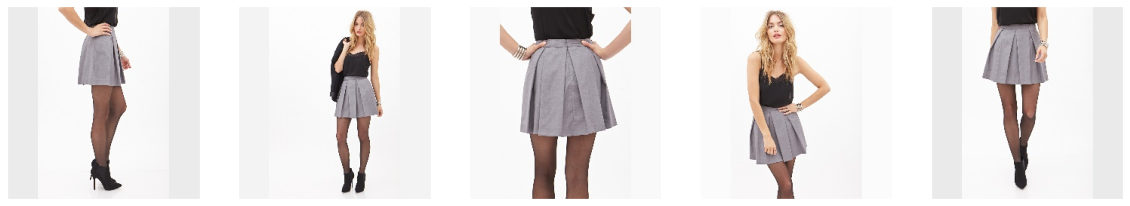

In [23]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
path='/content/inshop/WOMEN/Skirts/id_00000003'
images=os.listdir(path)
import matplotlib.pyplot as plt
for i,image in enumerate(images):
    image=cv2.imread(path+'/'+image)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1,len(images),i+1)
    plt.axis('off')
    plt.imshow(image)
plt.show()

## Thank you